In [18]:
model_type = "model_log_reg"

In [19]:
import sys
sys.path.append(rf'Classification\titanic\{model_type}')

In [20]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import dalex
from sklearn.inspection import PartialDependenceDisplay
import shap

In [21]:
yaml_path = rf"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\{model_type}\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

# Params

In [22]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])


X_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_train'])   
    
y_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_train'])
    
params_ = {
        'X_train_feat_sel': X_train_feat_sel,
        'y_train_feat_sel': y_train_feat_sel,
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

# Read Train / val dataset

In [23]:
X_train = pd.read_parquet(params_['X_train_feat_sel'])
y_train = pd.read_parquet(params_['y_train_feat_sel'])   

X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])    

In [24]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_{config['model']['model_version']}.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

# Drop columns

In [25]:
X_train.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)


# Partial dependence plot

c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\skle

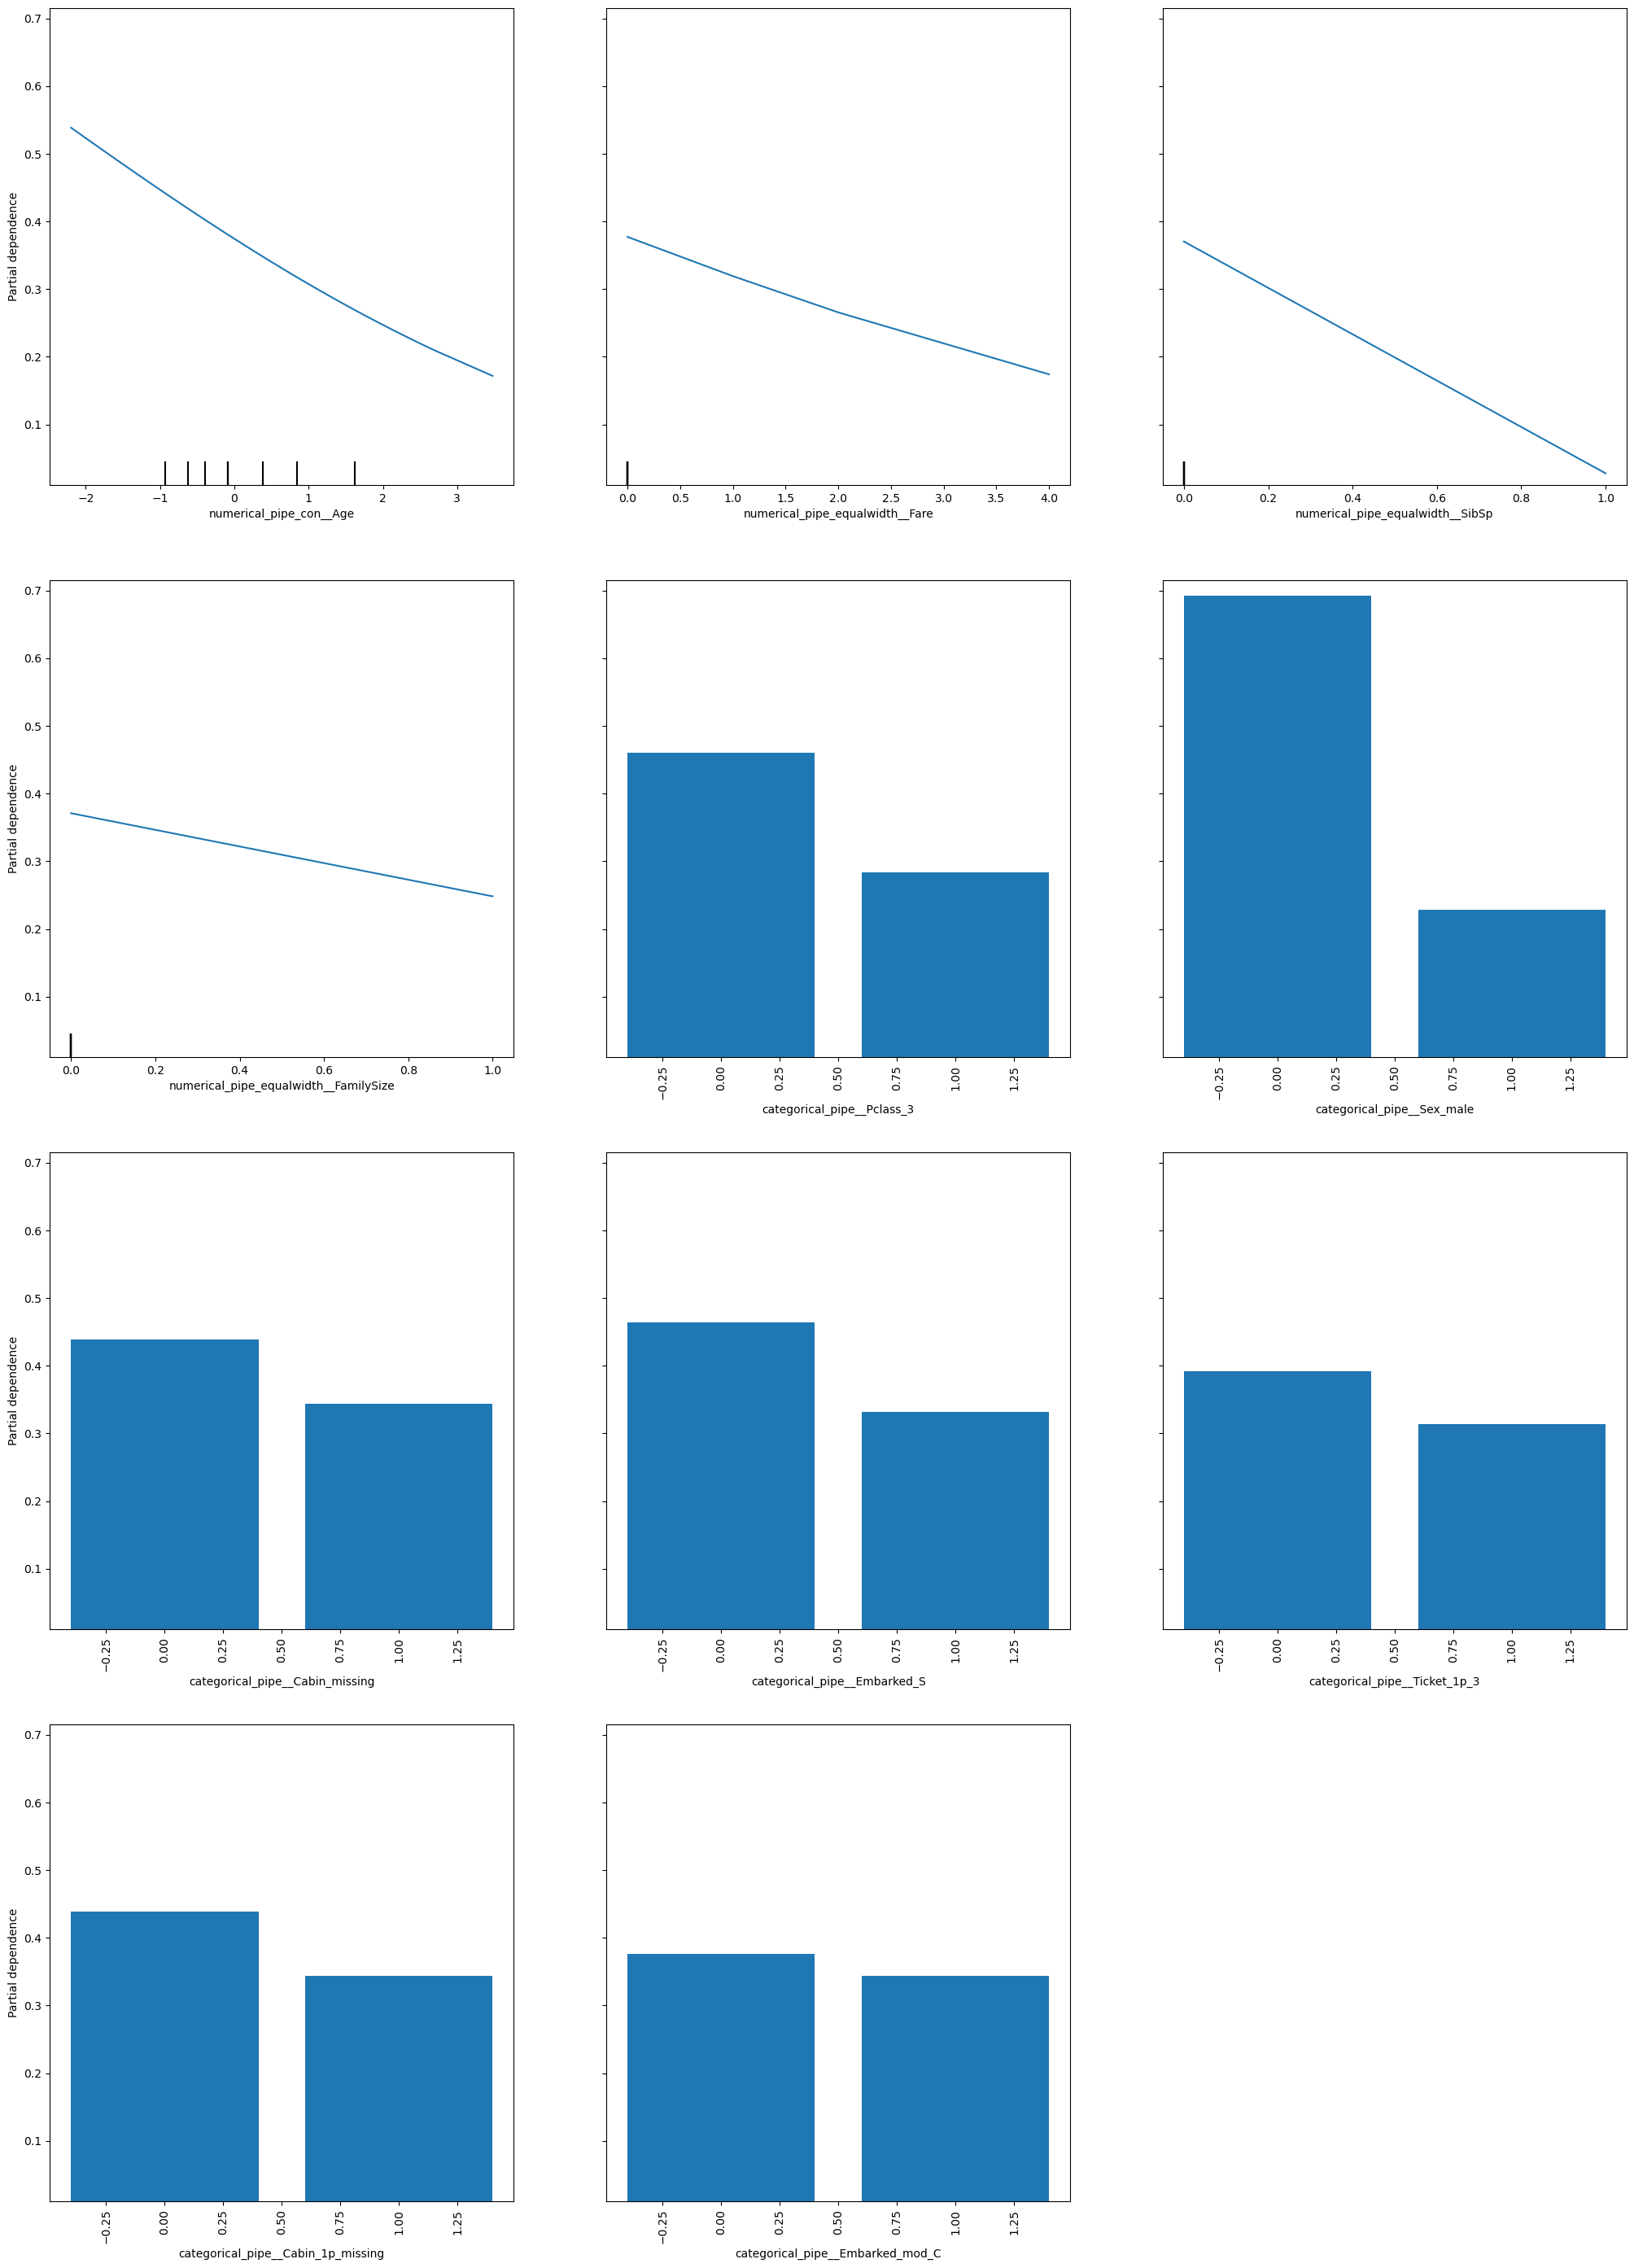

In [26]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [27]:
X_val_proba = model.predict_proba(X_val)

In [28]:
explainer = shap.Explainer(model.predict_proba, X_train)

In [29]:
shap_values_train = explainer(X_train)
shap_values_val = explainer(X_val)

PermutationExplainer explainer: 669it [00:27, 15.51it/s]                         


C:\Users\gustavo\AppData\Local\Temp\ipykernel_30392\1998943348.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


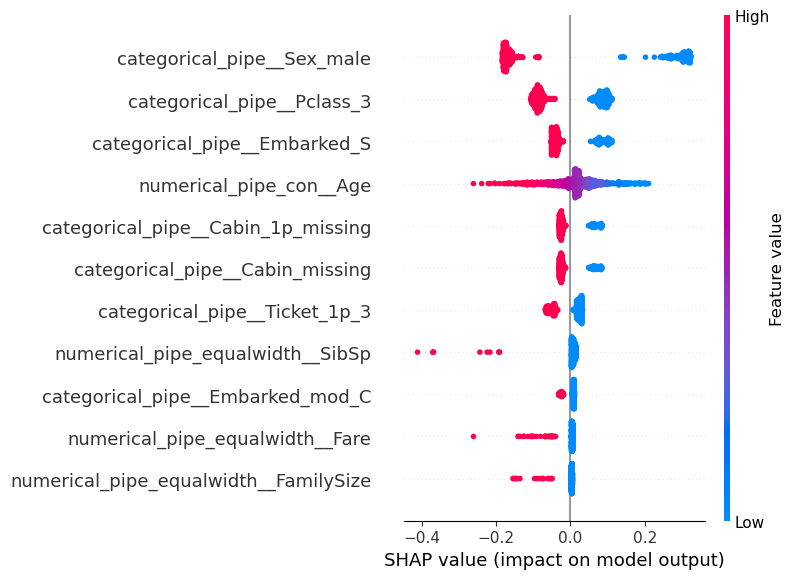

In [30]:
# Classe positiva (geralmente índice 1)
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train
)

C:\Users\gustavo\AppData\Local\Temp\ipykernel_30392\919611994.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


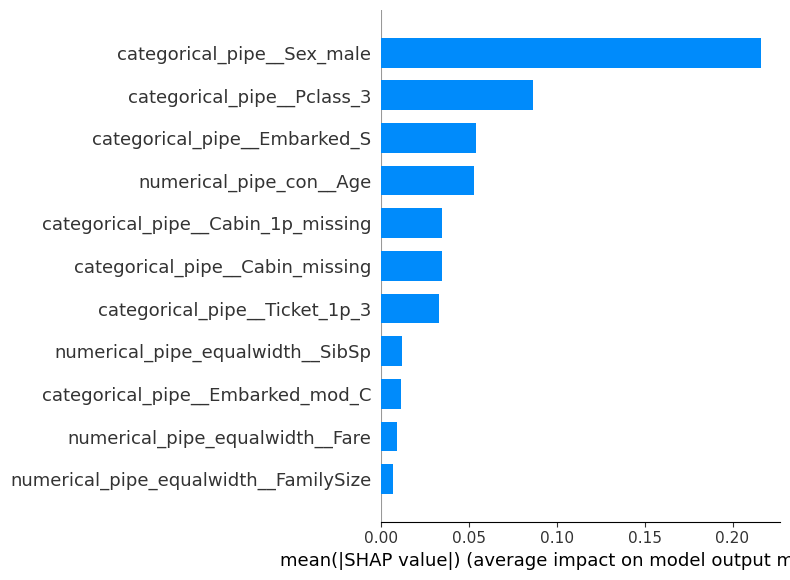

In [31]:
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train,
    plot_type="bar"
)


In [32]:
X_val.loc[727]

numerical_pipe_con__Age                 -0.082329
numerical_pipe_equalwidth__Fare          0.000000
numerical_pipe_equalwidth__SibSp         0.000000
numerical_pipe_equalwidth__FamilySize    0.000000
categorical_pipe__Pclass_3               1.000000
categorical_pipe__Sex_male               0.000000
categorical_pipe__Cabin_missing          1.000000
categorical_pipe__Embarked_S             0.000000
categorical_pipe__Ticket_1p_3            1.000000
categorical_pipe__Cabin_1p_missing       1.000000
categorical_pipe__Embarked_mod_C         0.000000
Name: 727, dtype: float64

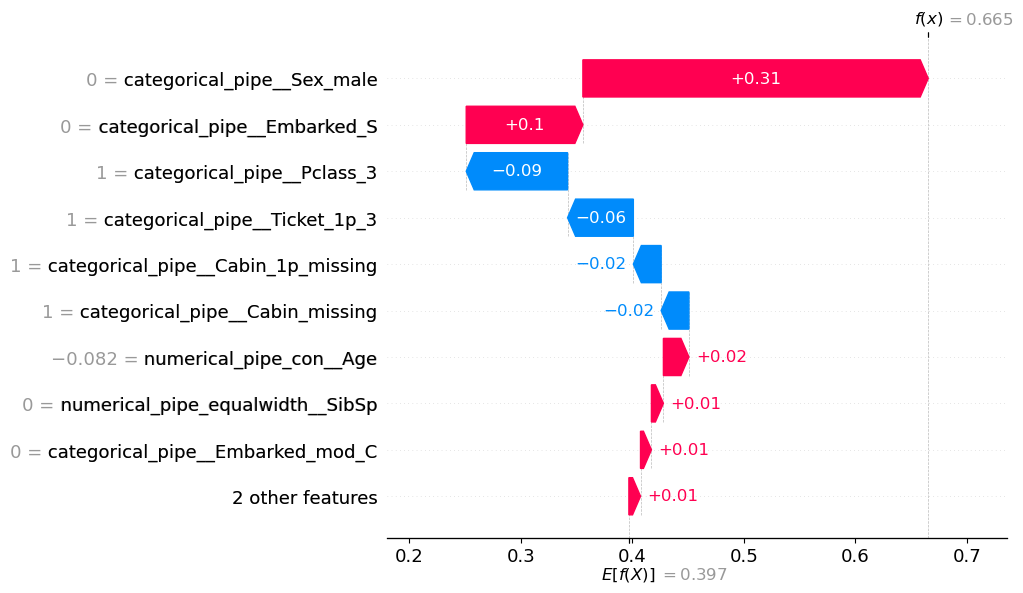

In [33]:
shap.plots.waterfall(shap_values_val[0,:,1])

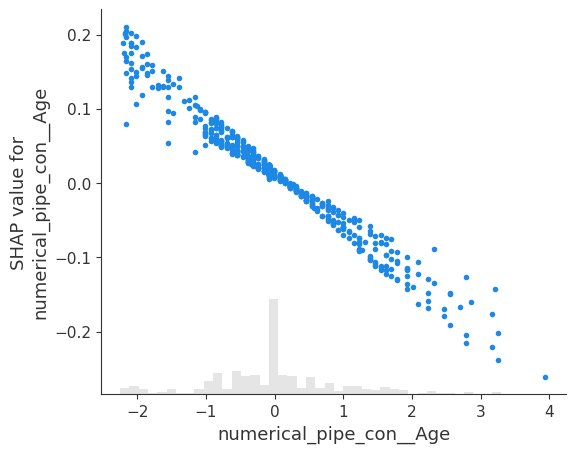

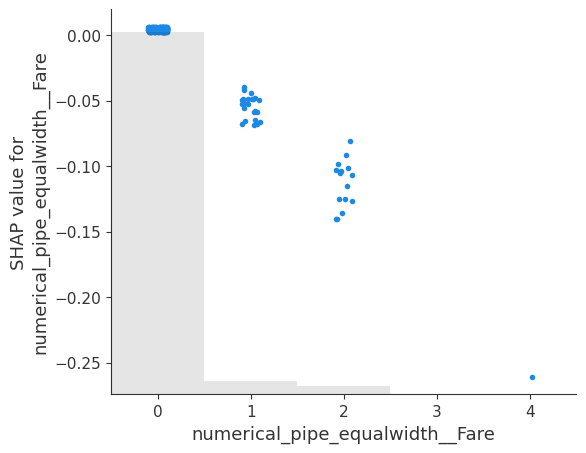

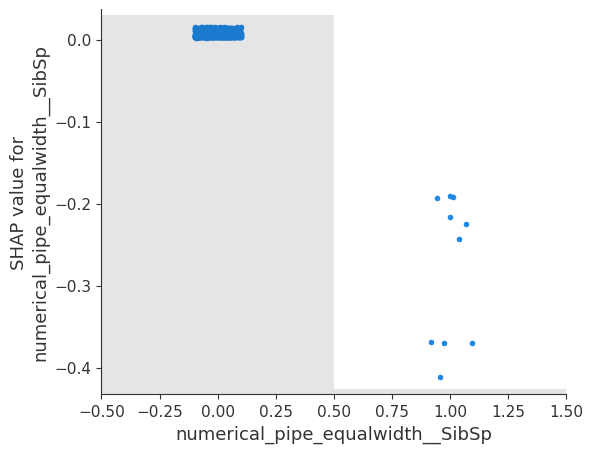

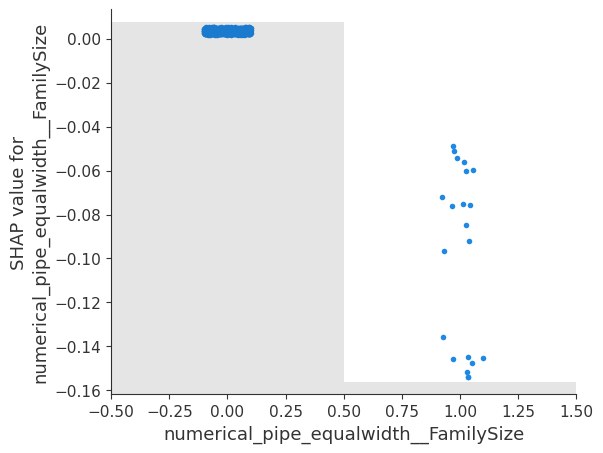

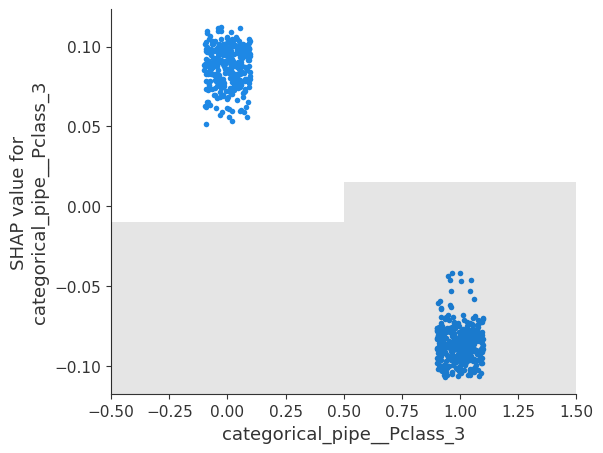

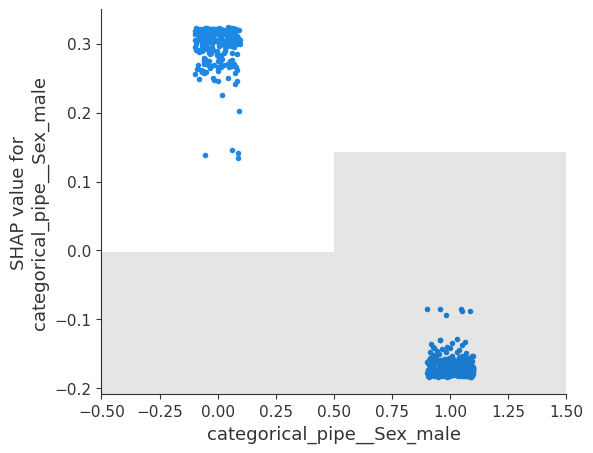

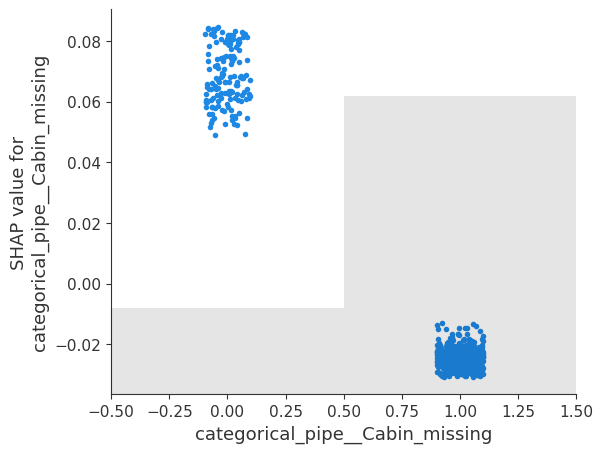

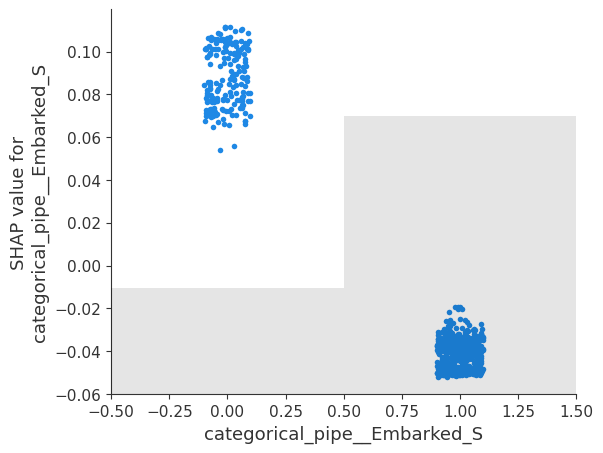

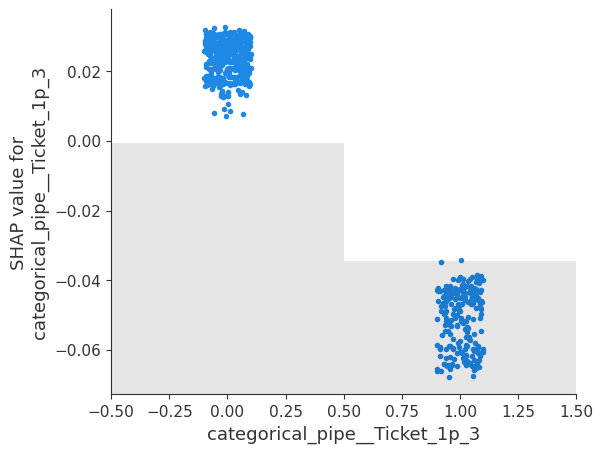

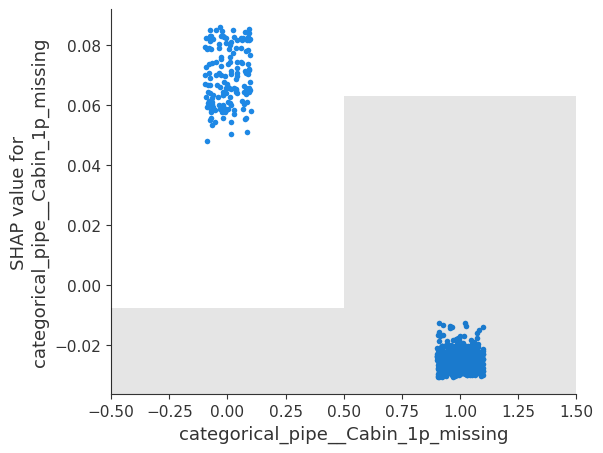

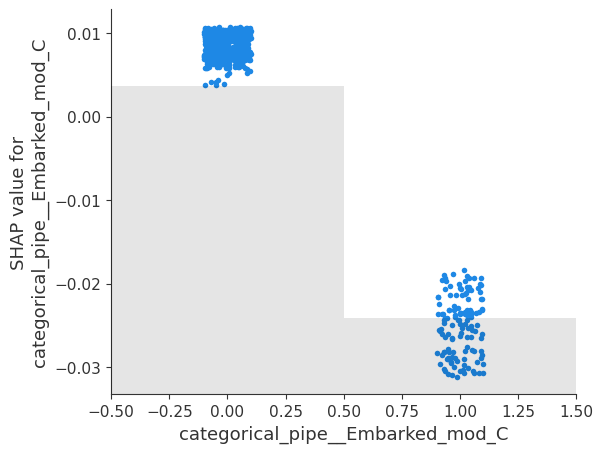

In [34]:
for col in X_val.columns:
    shap.plots.scatter(shap_values_train[:,col,1])